<a href="https://colab.research.google.com/github/raeubaen/raeubaen.github.io/blob/master/phil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Innanzitutto processo la maschera da applicare. <br>
Essa viene portata alla risoluzione finale in bianco e nero e mostrata in figura. <br>
`size` indica quante foto vanno inserite per riga e colonna.

     0    1    2    3    4    5    6    7    8    9
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
4  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
5  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
6  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
7  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0


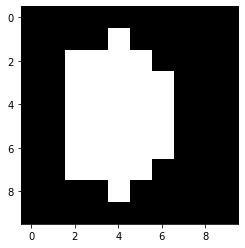

In [0]:
mask_size = 10
thresold = 200

mask = (
    np.asarray(
        im.open("mask.jpg").convert("L").resize((mask_size, mask_size))
    ) > thresold
) * 1.0


print(pd.DataFrame(mask))
plt.imshow(mask, cmap="binary")

Ora acquisisco l'immagine che verrà usata come "traccia" e anche tutte le altre, che verranno disposte a caso. <br>
A titolo di esempio, l'immagine "traccia" è bianca e le altre colorate.

Final resolution: 3000x3000

Immagine "traccia":


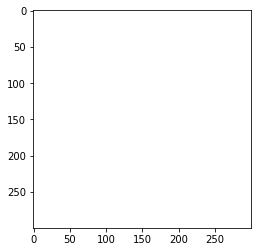

Altre immagini:


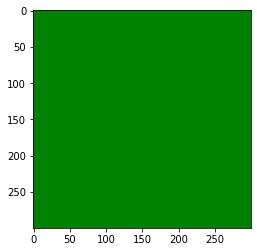

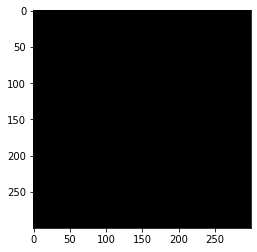

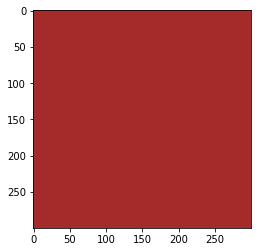

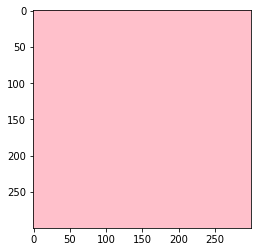

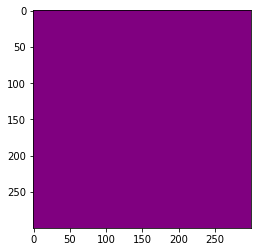

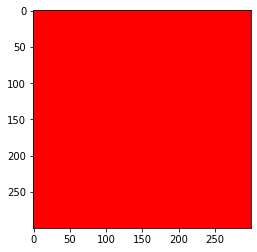

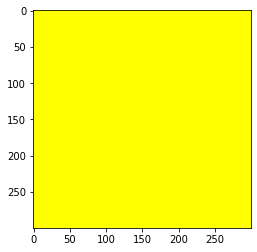

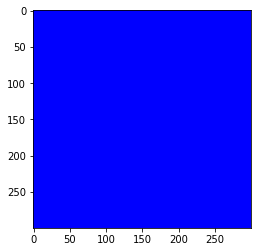

In [0]:
photo_size = 300
final_size = photo_size*mask_size
print(f"Final resolution: {final_size}x{final_size}\n")

print('Immagine "traccia":')
trace = np.array(
        im.open("trace.png").convert("RGB").resize((photo_size, photo_size))
    )
plt.imshow(trace)
plt.show()
print("Altre immagini:")
folder_name = "photos"
photos = []
for file in os.listdir(folder_name):
    photo = np.array(
        im.open(os.path.join(folder_name, file)).convert("RGB").resize((photo_size, photo_size))
    ).astype("uint8")
    photos.append(photo)
    plt.close()
    plt.imshow(photo)
    plt.show()


Le immagini colorate vengono disposte a caso, mentre quella bianca segue la disposizione indicata dalla maschera.

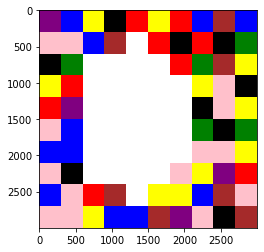

In [0]:
new_image = np.zeros((final_size, final_size, 3)).astype("uint8")

p = photo_size
photos_num = len(photos)
for i in range(mask_size):
    for j in range(mask_size):
        if mask[i][j] == 0:
            new_image[p*i : p*(i+1), p*j : p*(j+1)] = trace
        else:
            new_image[p*i : p*(i+1), p*j : p*(j+1)] = photos[np.random.randint(0, photos_num)]
            
plt.imshow(new_image)
plt.show()